Pemanggilan Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score
import seaborn as sns
import sys 

Load Dataset

In [ ]:
df = pd.read_csv('/content/dataset.csv')
print(df.head())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

In [ ]:
df1 = pd.read_csv('/content/Symptom-severity.csv')
print(df1.head())

                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5


Melihat Informasi Umum pada Dataset

In [ ]:
df.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


Melihat Jumlah Data dan Atributnya

In [ ]:
df.shape

(4920, 18)

In [ ]:
df1.shape

(133, 2)

Melihat Distribusi Jumlah Masing-Masing Penyakit pada Dataset

In [ ]:
print(df.Disease.value_counts())

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

Pembersihan Data

In [ ]:
df.isna().sum()
df.isnull().sum()

cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Konversi Tiap-Tiap Gejala ke Dalam Bentuk Bobot Masing-masing

In [ ]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]
    
d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Menyimpan List Penyakit Beserta Gejala dengan Bobotnya

In [ ]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

Melihat Korelasi Antar Gejala pada Dataset

In [ ]:
df.corr()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
Symptom_1,1.000000,-0.146419,0.056128,0.146103,-0.107899,-0.020089,-0.167150,-0.193221,-0.179147,-0.179695,-0.098569,-0.011184,0.006645,0.010002,0.014025,0.005112,0.054539
Symptom_2,-0.146419,1.000000,0.115827,0.090560,0.060731,-0.132511,-0.082145,-0.106352,-0.113552,-0.140147,-0.086057,-0.034644,-0.061888,-0.054663,-0.016947,-0.006225,-0.113490
Symptom_3,0.056128,0.115827,1.000000,-0.024115,0.107116,0.014875,-0.052545,-0.088597,-0.108398,-0.098737,-0.116774,-0.045480,0.005315,-0.044110,-0.017018,-0.005994,-0.003849
Symptom_4,0.146103,0.090560,-0.024115,1.000000,0.192865,0.255670,0.227431,0.138142,0.160603,0.142271,0.185036,0.096312,0.090282,0.036258,-0.013741,-0.014766,0.010907
Symptom_5,-0.107899,0.060731,0.107116,0.192865,1.000000,0.551814,0.469017,0.430586,0.373502,0.332272,0.269372,0.178673,0.169743,0.235818,0.235701,0.168063,0.218260
Symptom_6,-0.020089,-0.132511,0.014875,0.255670,0.551814,1.000000,0.682837,0.574690,0.525865,0.510769,0.422528,0.393040,0.284831,0.269362,0.212757,0.223633,0.017640
Symptom_7,-0.167150,-0.082145,-0.052545,0.227431,0.469017,0.682837,1.000000,0.802102,0.727088,0.665241,0.564638,0.417492,0.368414,0.265152,0.253330,0.232676,0.205205
Symptom_8,-0.193221,-0.106352,-0.088597,0.138142,0.430586,0.574690,0.802102,1.000000,0.904514,0.804851,0.635868,0.470393,0.421599,0.314389,0.267335,0.214612,0.232835
Symptom_9,-0.179147,-0.113552,-0.108398,0.160603,0.373502,0.525865,0.727088,0.904514,1.000000,0.886842,0.675044,0.474840,0.411184,0.317222,0.288592,0.233379,0.186614
Symptom_10,-0.179695,-0.140147,-0.098737,0.142271,0.332272,0.510769,0.665241,0.804851,0.886842,1.000000,0.760338,0.578787,0.485571,0.376276,0.334139,0.310639,0.159347


Pembagian Data Training dan Testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, test_size = 0.2, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3936, 17) (984, 17) (3936,) (984,)


Melakukan Tuning Parameter pada Metode SVM

In [ ]:
print("Tuning Parameter metode SVM")
kernel_ds = ['linear','sigmoid','rbf','poly']
ker_ds = []
acc_ds = []

for i in kernel_ds:
  from sklearn import metrics
    
  X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=True, test_size = 0.2, random_state=0)

  svm_ds = SVC(
      kernel = i,
      C = 1,
      gamma = 0.1
  )

  svm_ds.fit(X_train, y_train)
  y_pred = svm_ds.predict(X_test)
  score = metrics.accuracy_score(y_test,y_pred)
  
  ker_ds.append(i)
  acc_ds.append(score)

  #print("Nilai Akurasi kernel",i," = ", score) 

dict = {
    'kernel' : ker_ds,
    'akurasi': acc_ds
}

ds = pd.DataFrame(dict)
ds.sort_values(by=['akurasi'], ascending=False)

Tuning Parameter metode SVM


,kernel,akurasi
3,poly,0.993902
2,rbf,0.992886
0,linear,0.984756
1,sigmoid,0.013211


In [ ]:
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier(random_state=0)
params_rf = {
    'max_depth': [2,3,5,10,15],
    'min_samples_leaf': [2,3,5],
    'n_estimators': [50,60,100]
}


# Instantiate the grid search model
grid_rf = GridSearchCV(estimator=clf,
                       param_grid=params_rf,
                       cv = 10,
                       scoring="accuracy")
grid_rf.fit(X_train, y_train)

print(grid_rf.best_params_)
print(grid_rf.best_score_)


{'max_depth': 15, 'min_samples_leaf': 2, 'n_estimators': 50}
0.9946661758437634


Membangun Model Menggunakan SVM

In [ ]:
model = SVC(kernel='poly',C = 1, gamma = 0.1)
model.fit(x_train, y_train)

preds = model.predict(x_test)
#print(preds)


Membangun Model Menggunakan Random Forest

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=100)
model1.fit(x_train, y_train)

pred = model1.predict(x_test)
#print(pred)

Mengecek Kinerja Model SVM dengan Confussion Matrix

F1-score = 99.40499454843616 
 Accuracy = 99.39024390243902 
 Recall = 99.4653602946286 
 Presisi = 99.40044049269925


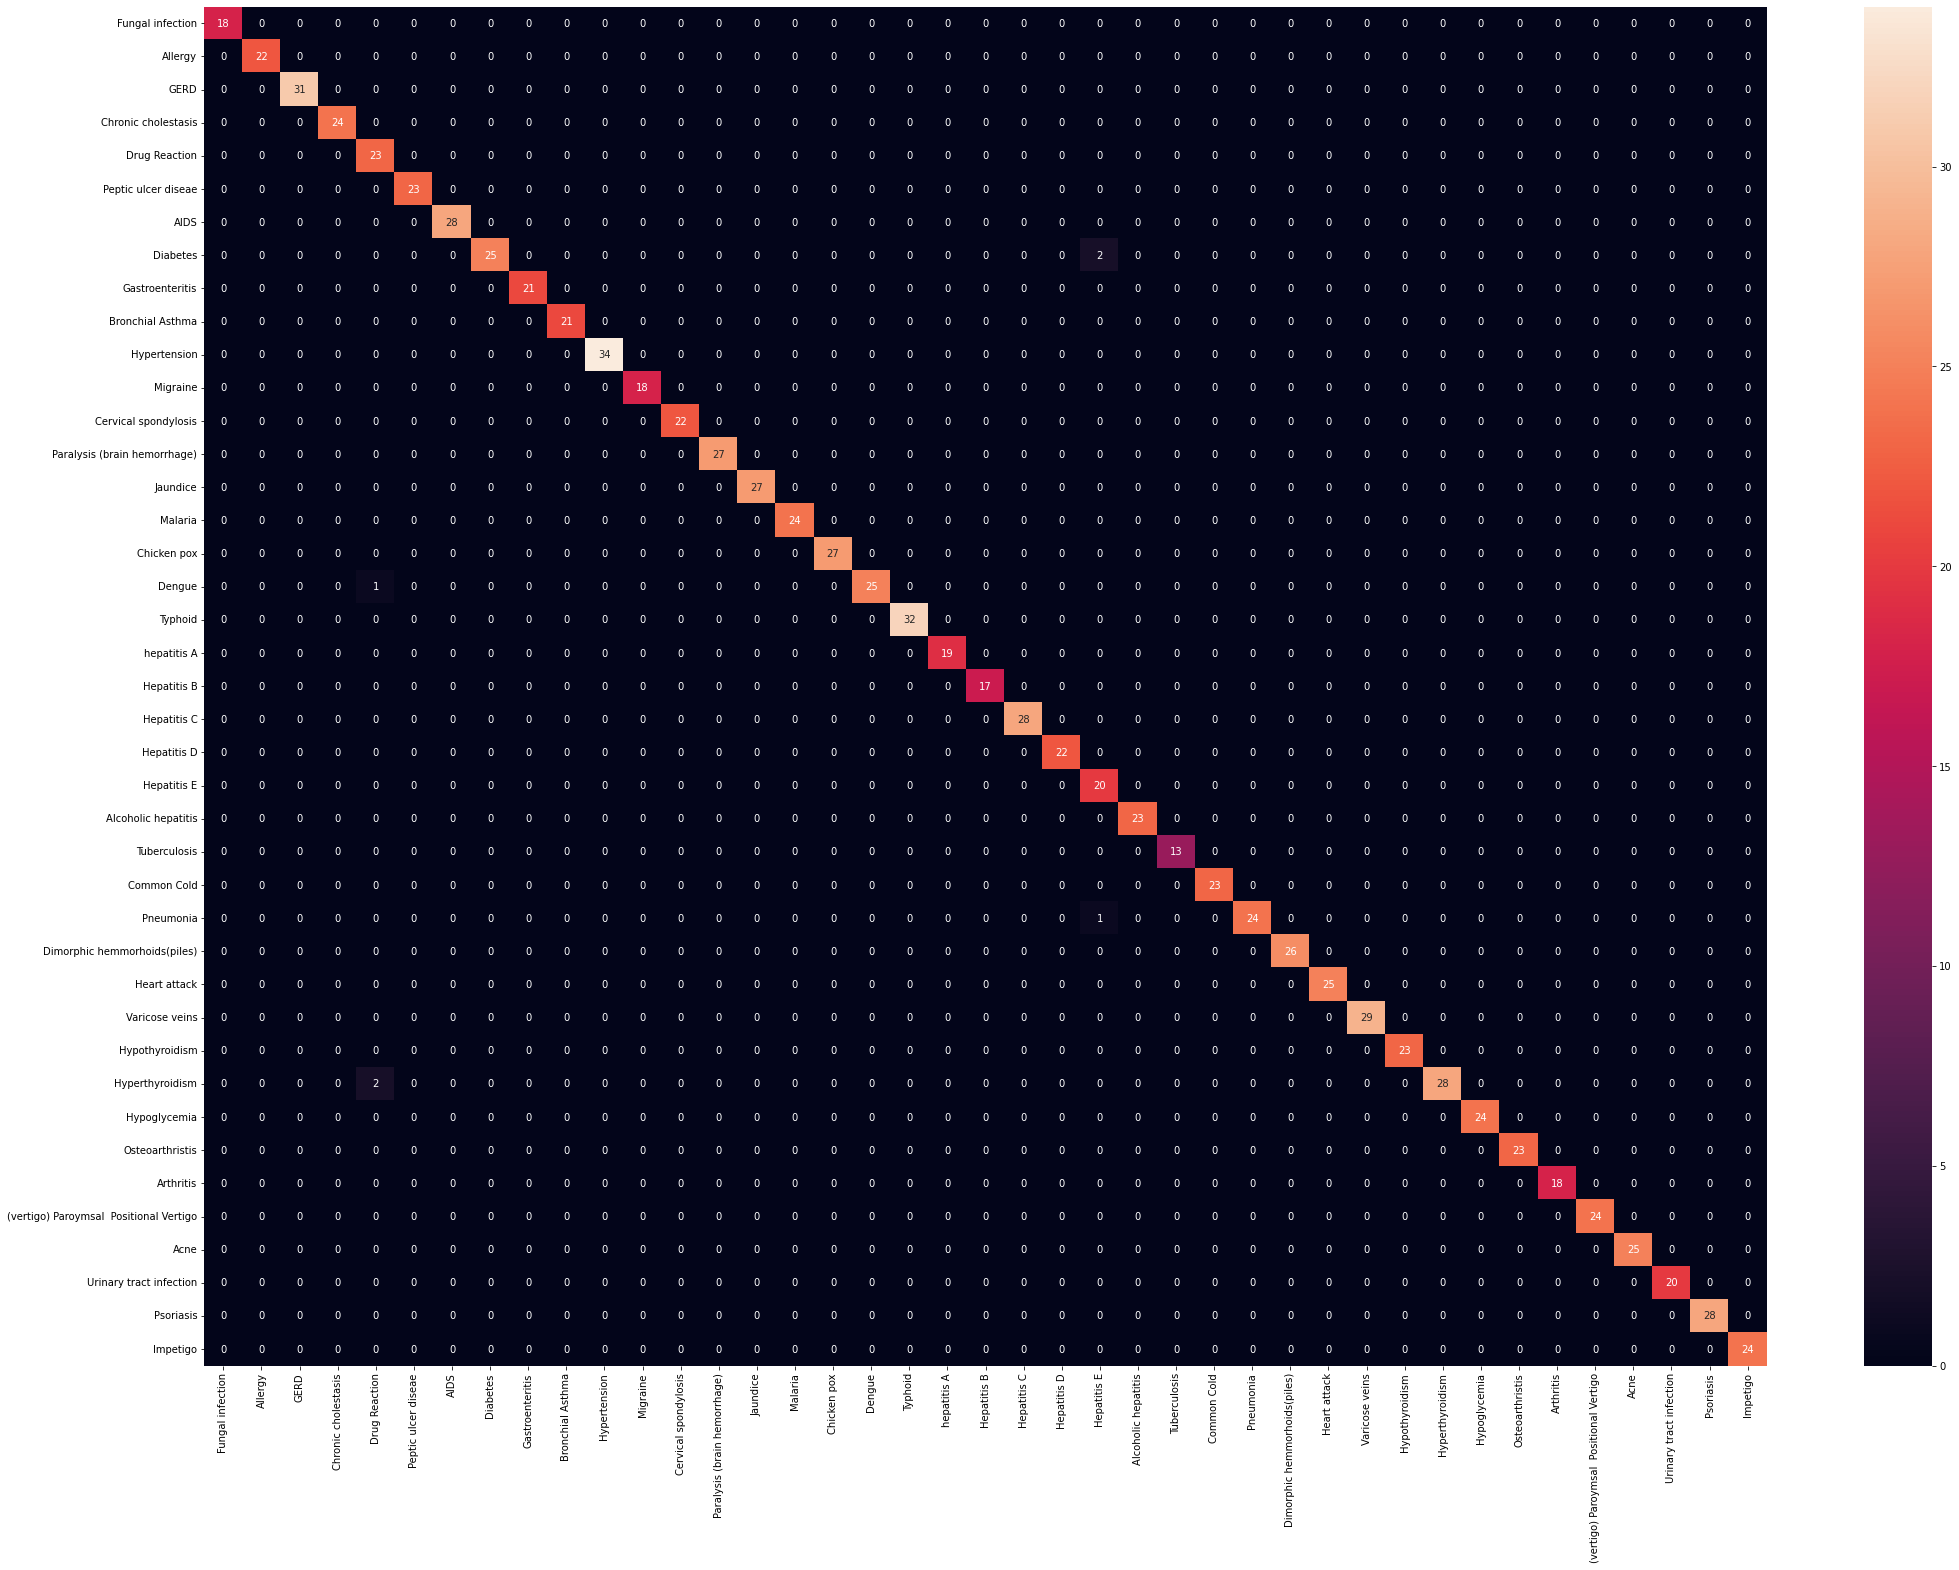

In [ ]:
fig, ax = plt.subplots(figsize=(35,25))
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score =', f1_score(y_test, preds, average='macro')*100, '\n',
      'Accuracy =', accuracy_score(y_test, preds)*100, '\n',
      'Recall =', recall_score(y_test, preds, average='macro')*100, "\n",
      'Presisi =', precision_score(y_test, preds, average='macro')*100)
sns.heatmap(df_cm, annot=True)

Mengecek Kinerja Model Random Forest dengan Confussion Matrix

F1-score = 99.40499454843616 /n Accuracy = 99.39024390243902 /n Recall = 99.4653602946286 /n Presisi = 99.40044049269925


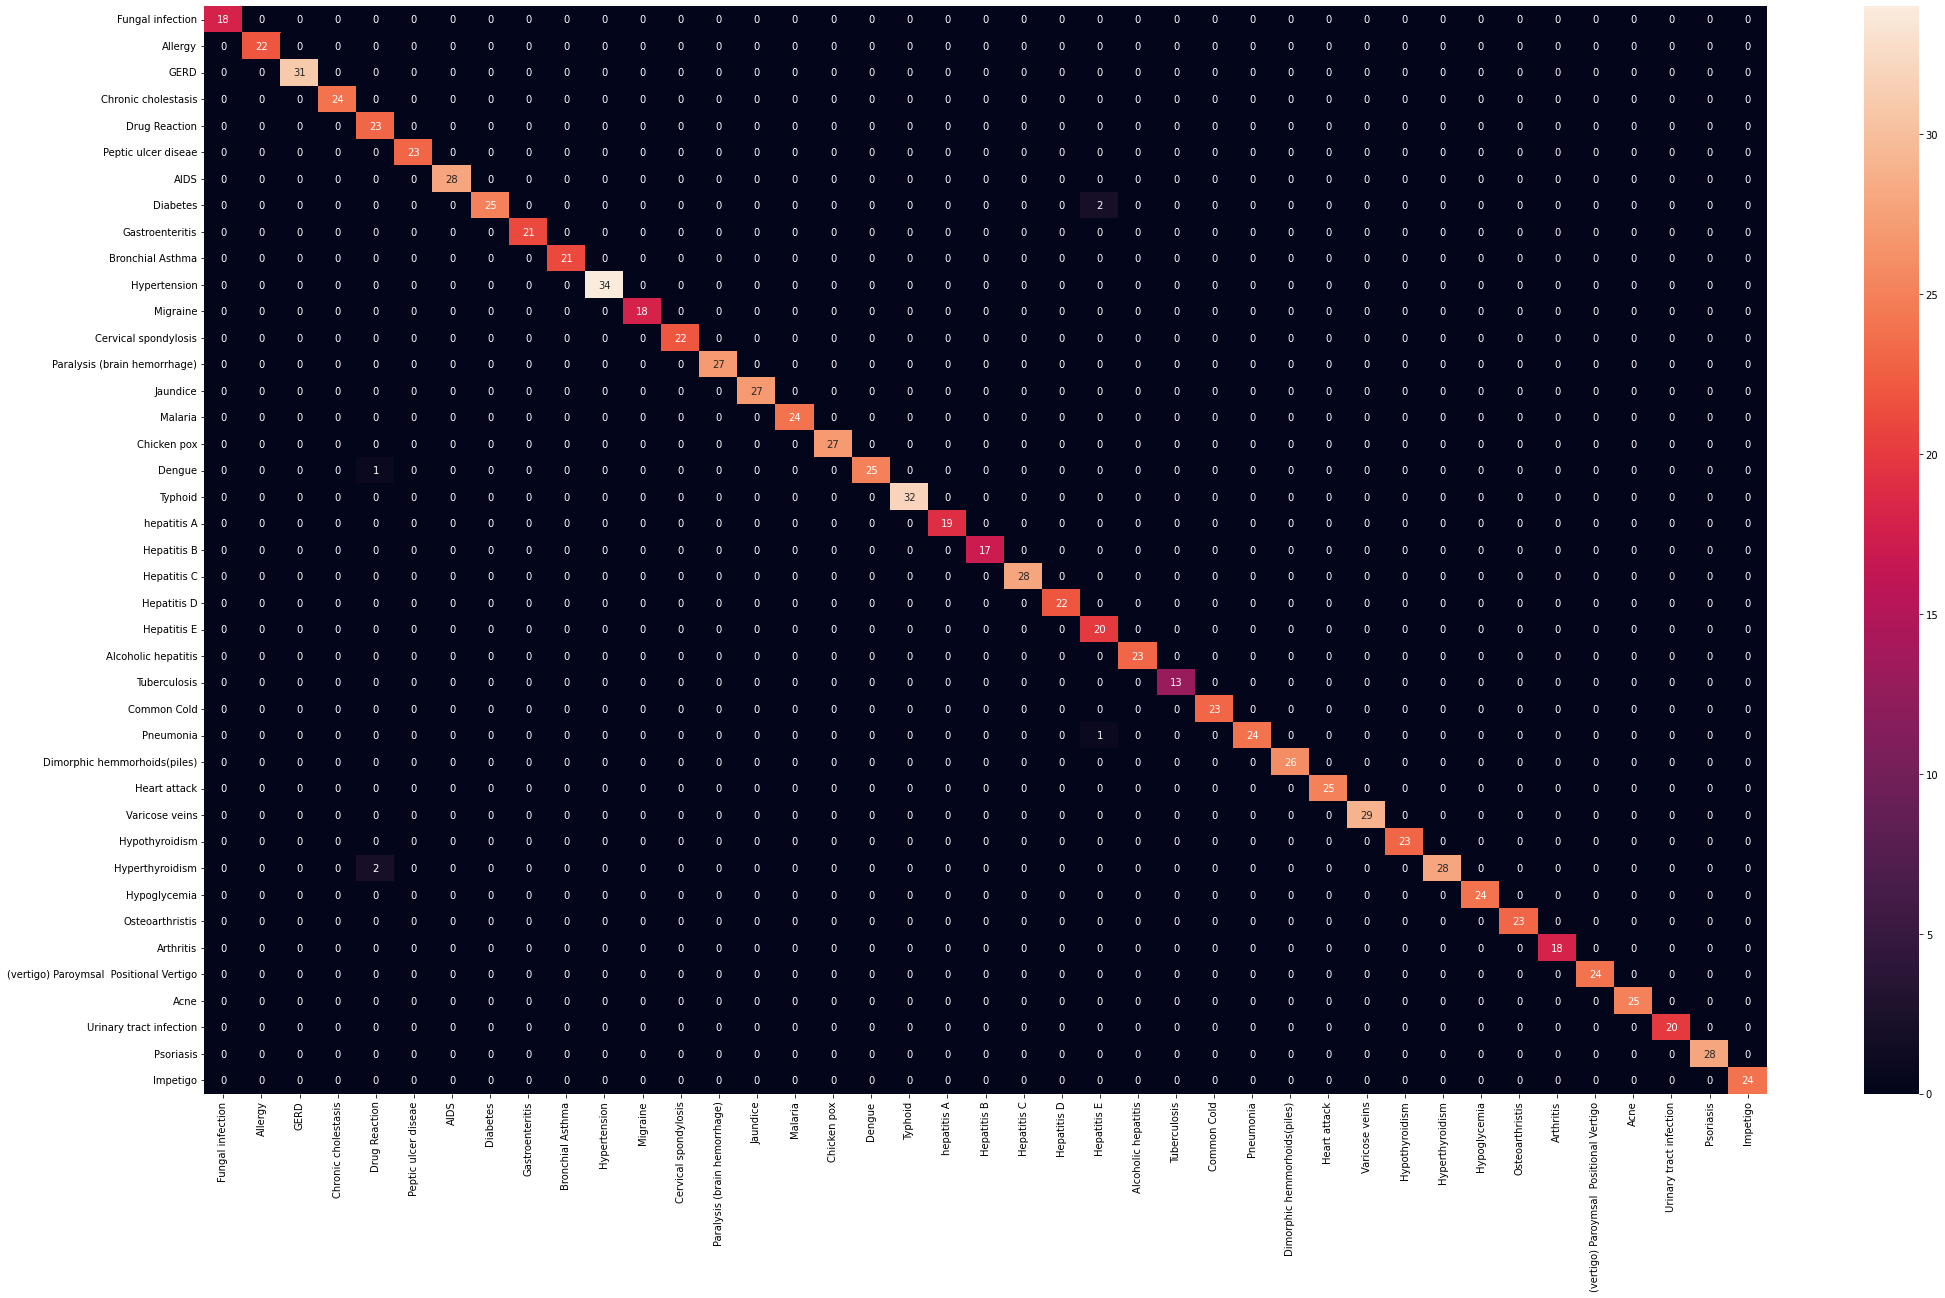

In [ ]:
fig, ax = plt.subplots(figsize=(35,20))
conf_rf = confusion_matrix(y_test, pred)
df_rf = pd.DataFrame(conf_rf, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score =', f1_score(y_test, pred, average='macro')*100, '/n', 
      'Accuracy =', accuracy_score(y_test, pred)*100, '/n',
      'Recall =', recall_score(y_test, pred, average='macro')*100, "/n",
      'Presisi =', precision_score(y_test, pred, average='macro')*100)
sns.heatmap(df_rf, annot=True)

Grafik Perbandingan Kinerja Metode SVM dan Random Forest

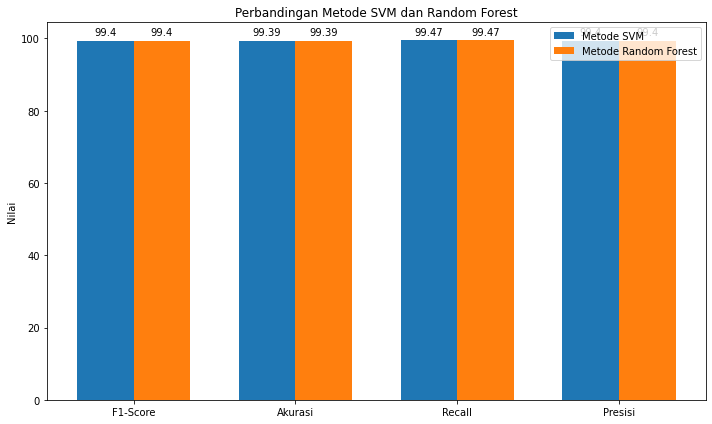

In [ ]:
import matplotlib.pyplot as plt

labels = ['F1-Score', 'Akurasi', 'Recall', 'Presisi']
kinerja_svm = [round(f1_score(y_test, preds, average='macro')*100,2),
               round(accuracy_score(y_test, preds)*100,2),
               round(recall_score(y_test, preds, average='macro')*100,2),
               round(precision_score(y_test, preds, average='macro')*100,2)]
               
kinerja_rf = [round(f1_score(y_test, pred, average='macro')*100,2),
              round(accuracy_score(y_test, pred)*100,2),
              round(recall_score(y_test, pred, average='macro')*100,2),
              round(precision_score(y_test, pred, average='macro')*100,2)]

# create plot
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, kinerja_svm, width, label='Metode SVM')
rects2 = ax.bar(x + width/2, kinerja_rf, width, label='Metode Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nilai')
ax.set_title('Perbandingan Metode SVM dan Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()